In [ ]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk import sent_tokenize
from gensim.utils import simple_preprocess
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

import gensim
from gensim.models import Word2Vec, KeyedVectors
import gensim.downloader as api

In [23]:
df=pd.read_csv('amazon_reviews.csv')
df.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4.0,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0
1,1,0mie,5.0,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0
2,2,1K3,4.0,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0
3,3,1m2,5.0,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5.0,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0


In [24]:
df=df[['reviewText','overall']]
df.head()
len(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4915 entries, 0 to 4914
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   reviewText  4914 non-null   object 
 1   overall     4915 non-null   float64
dtypes: float64(1), object(1)
memory usage: 76.9+ KB


In [25]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Welcome\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Welcome\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Welcome\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\Welcome\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Welcome\AppData\Roaming\nltk

True

In [29]:
lemmatizer = WordNetLemmatizer()

corpus = []
for i in range(len(df)):
    review = re.sub('[^a-zA-Z]',' ', df['reviewText'].astype(str)[i])
    review = review.lower()
    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    # print(review)
    review = ' '.join(review)
    corpus.append(review)
corpus    

['issue',
 'purchased device worked advertised never much phone memory since download lot stuff brainer',
 'work expected sprung higher capacity think made bit cheesier earlier version paint look clean',
 'think worked great diff bran gb card went south month one held pretty well since note update month zero issue since transferred note note card reliable solid cheer',
 'bought retail packaging arrived legit orange envelope english version asian like picture show arrived quickly bought retail packaging htc one sv lg optimus card working order probably best price get nice sd card',
 'mini storage anything else supposed purchased add additional storage microsoft surface pro tablet come gb supposed sandisk long standing reputation speaks',
 'phone never skip beat file transfer speedy corruption issue memory fade issue would expect sandisk brand great card entrust precious file slightly cheaper piece crap lose everything forgive spending extra couple buck trusted product go good qa',
 'har

In [32]:
words=[]
for sent in corpus:
    sent_token = sent_tokenize(sent)
    for sent in sent_token:
        words.append(simple_preprocess(sent))

In [33]:
words

[['issue'],
 ['purchased',
  'device',
  'worked',
  'advertised',
  'never',
  'much',
  'phone',
  'memory',
  'since',
  'download',
  'lot',
  'stuff',
  'brainer'],
 ['work',
  'expected',
  'sprung',
  'higher',
  'capacity',
  'think',
  'made',
  'bit',
  'cheesier',
  'earlier',
  'version',
  'paint',
  'look',
  'clean'],
 ['think',
  'worked',
  'great',
  'diff',
  'bran',
  'gb',
  'card',
  'went',
  'south',
  'month',
  'one',
  'held',
  'pretty',
  'well',
  'since',
  'note',
  'update',
  'month',
  'zero',
  'issue',
  'since',
  'transferred',
  'note',
  'note',
  'card',
  'reliable',
  'solid',
  'cheer'],
 ['bought',
  'retail',
  'packaging',
  'arrived',
  'legit',
  'orange',
  'envelope',
  'english',
  'version',
  'asian',
  'like',
  'picture',
  'show',
  'arrived',
  'quickly',
  'bought',
  'retail',
  'packaging',
  'htc',
  'one',
  'sv',
  'lg',
  'optimus',
  'card',
  'working',
  'order',
  'probably',
  'best',
  'price',
  'get',
  'nice',
 

In [35]:
custom_model=gensim.models.Word2Vec(window=10,min_count=2,vector_size=150)
custom_model.build_vocab(words)
custom_model.corpus_count

4915

In [36]:
custom_model.corpus_total_words

122879

In [37]:
custom_model.train(words,total_examples=custom_model.corpus_count, epochs=10)

(959679, 1228790)

In [42]:
custom_model.wv["good"]

array([ 0.08983443, -0.11292344, -0.20493428, -0.13109896, -0.4510294 ,
        0.7661345 ,  0.24972971,  0.8636665 ,  0.13800743,  0.43443924,
        1.2764528 , -0.31222942, -0.6524649 , -0.05516285, -0.19622345,
       -0.22549997,  0.42295164, -0.43996114,  0.14338839, -0.43556818,
        0.75519526, -0.4093335 , -0.03470775, -0.24265891,  0.11101558,
        0.13462041, -0.46334574, -0.38629714, -0.11774191, -0.43342176,
        0.52169985, -0.10747124, -0.38464627, -0.80981   , -0.08959785,
       -0.04842742,  0.14661814, -0.87997246,  0.67182356, -0.8237326 ,
        0.08475062, -0.2127813 , -0.11700143, -0.33194032, -0.00600187,
        0.30269405, -0.0363619 , -0.29540017, -0.6669749 , -0.2935443 ,
       -0.22921433, -0.30665645, -0.85464257,  0.6261209 , -0.3046798 ,
       -0.19759722, -0.73135805,  0.09921737, -0.16485763, -0.05124921,
        0.02106086,  0.09832878,  0.62730956,  0.5585232 ,  0.0807711 ,
        0.15289854,  0.05055597, -0.5671186 , -0.8420491 ,  0.15

In [43]:
custom_model.wv.most_similar("great")

[('perfect', 0.9309388399124146),
 ('dream', 0.8749821186065674),
 ('well', 0.8590437769889832),
 ('awesome', 0.8553643226623535),
 ('bout', 0.8493881225585938),
 ('complaint', 0.8487467169761658),
 ('job', 0.8406946063041687),
 ('smartphone', 0.8324588537216187),
 ('grandson', 0.8323909044265747),
 ('perfectly', 0.830452561378479)]

In [44]:
custom_model.wv.most_similar("poor")

[('fake', 0.9860648512840271),
 ('vendor', 0.9856462478637695),
 ('com', 0.9833366274833679),
 ('authentic', 0.9828587174415588),
 ('confident', 0.9821245074272156),
 ('shame', 0.9821226000785828),
 ('hesitant', 0.9815990328788757),
 ('selling', 0.9807732105255127),
 ('thru', 0.9802772402763367),
 ('counterfeit', 0.9802636504173279)]

In [54]:
custom_model.wv.doesnt_match(['good''great','worst','like'])

'worst'

In [45]:
word_vocab = custom_model.wv[custom_model.wv.index_to_key]
len(word_vocab)

3619

In [ ]:
 PCA for Dimensionality Reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
data_pca = pca.fit_transform(word_vocab)

<Figure size 1600x800 with 0 Axes>

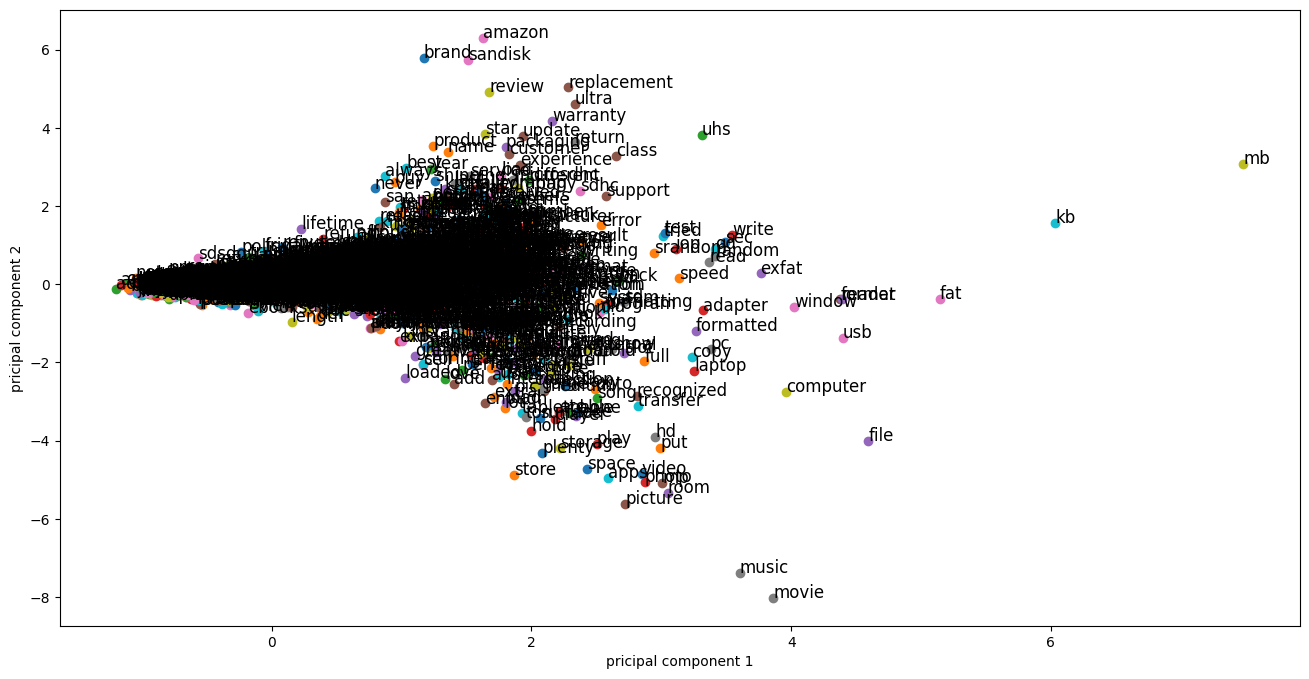

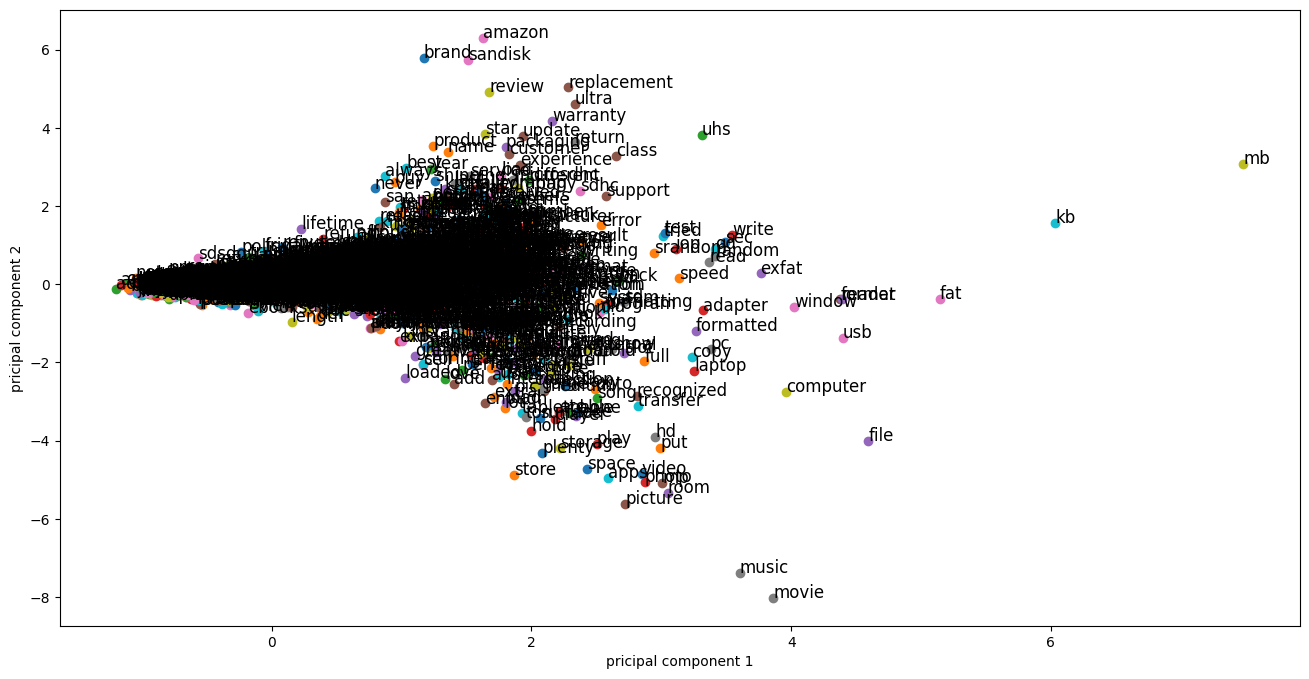

In [51]:
plt.figure(figsize=(16, 8))
for i, word in enumerate(custom_model.wv.index_to_key):
    # print(i,word)
    plt.scatter(data_pca[i,0], data_pca[i,1])
    # plt.annotate(word, (data_pca[i,0], data_pca[i,1]))
    plt.text(data_pca[i, 0], data_pca[i, 1], word, fontsize=12)
plt.xlabel("pricipal component 1")
plt.ylabel("pricipal component 2")
plt.show()